# <font color='blue'> Nearest Neighbors
## Supervised(Classification, Regression) learning 
## Unsupervised learning

<img src ='https://images.unsplash.com/photo-1581187254571-b0844d86871a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8N3x8bmVpZ2hib3Job29kfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=800&q=60'>

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

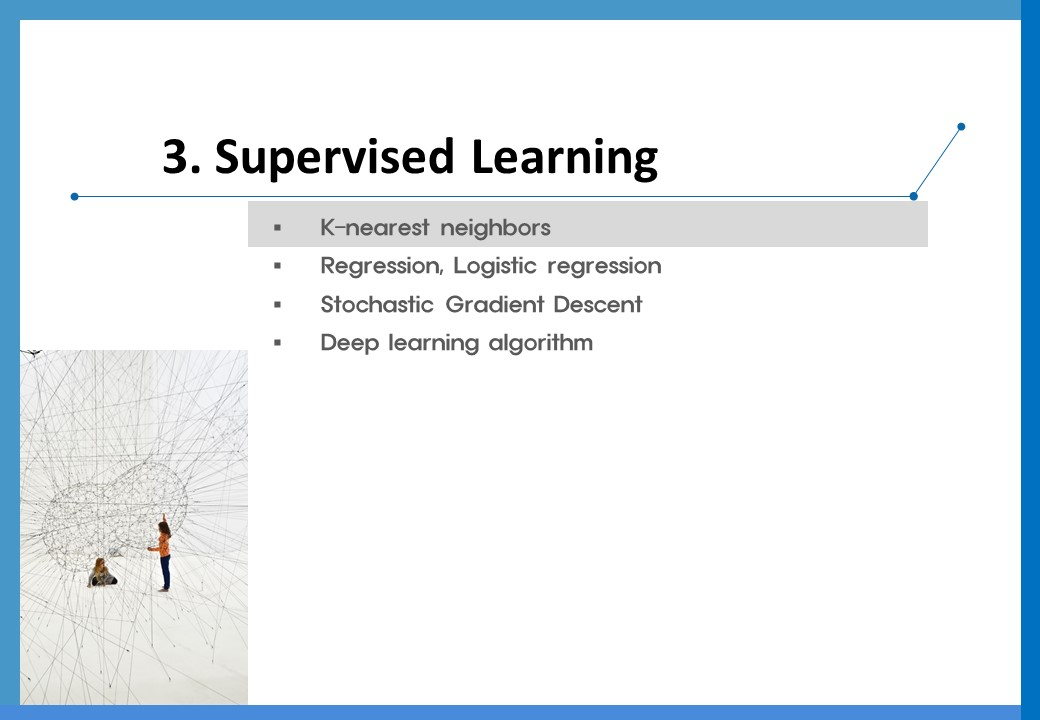

In [ ]:
Image(filename=dir_path + '/슬라이드80.jpg', width=width, height=height)

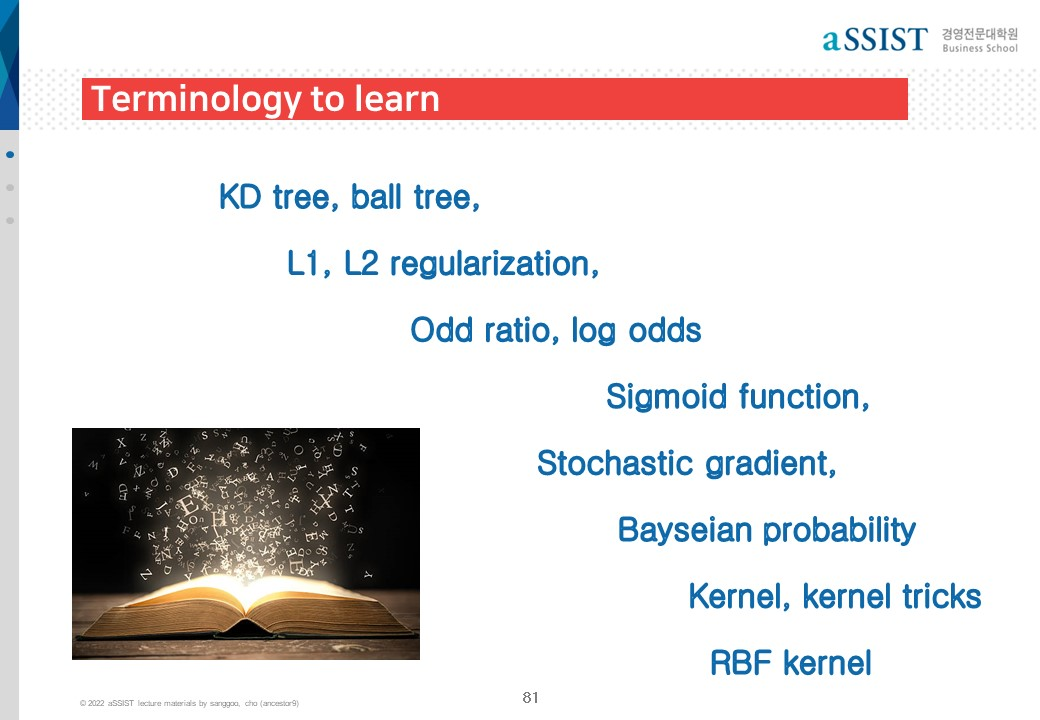

In [ ]:
Image(filename=dir_path + '/슬라이드81.jpg', width=width, height=height)

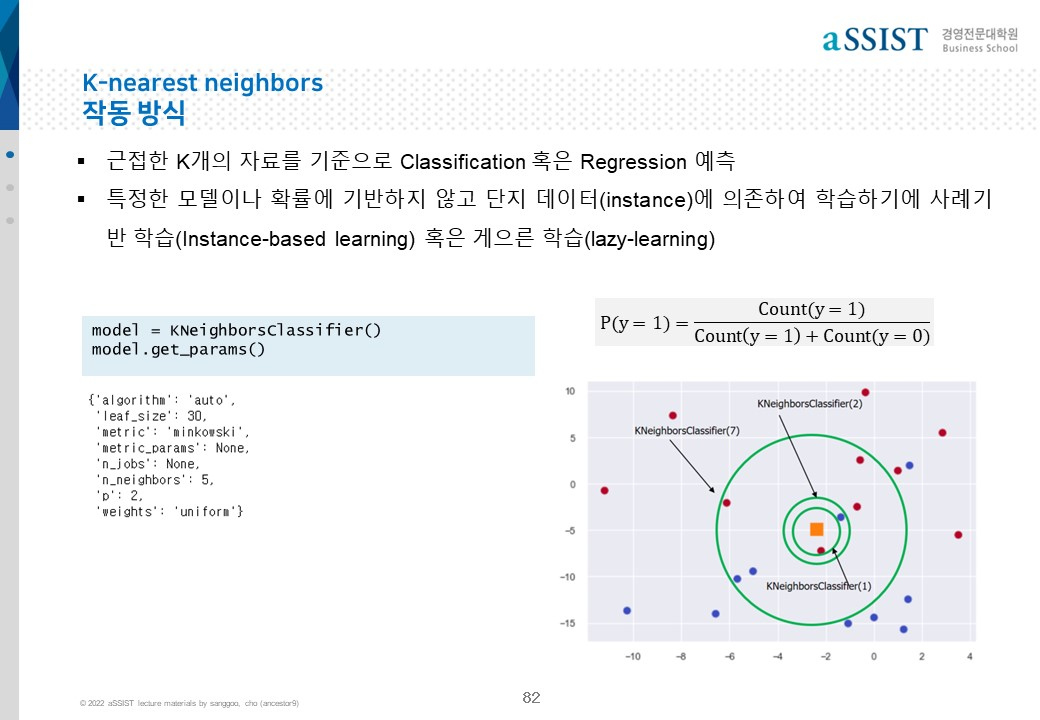

In [ ]:
Image(filename=dir_path + '/슬라이드82.jpg', width=width, height=height)

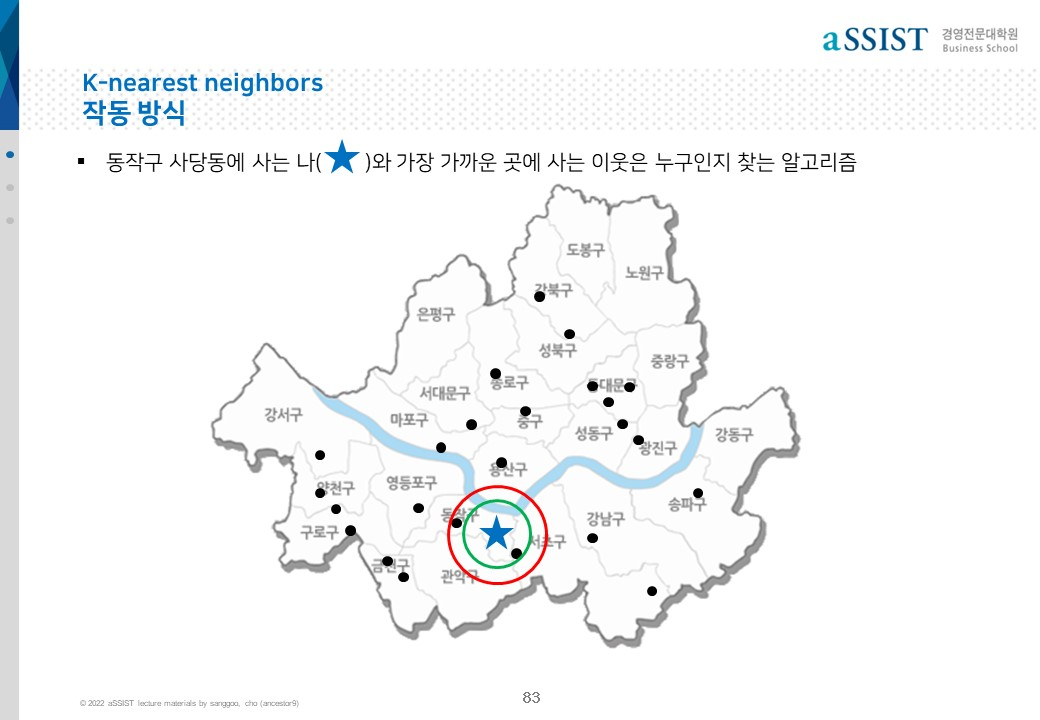

In [ ]:
Image(filename=dir_path + '/슬라이드83.jpg', width=width, height=height)

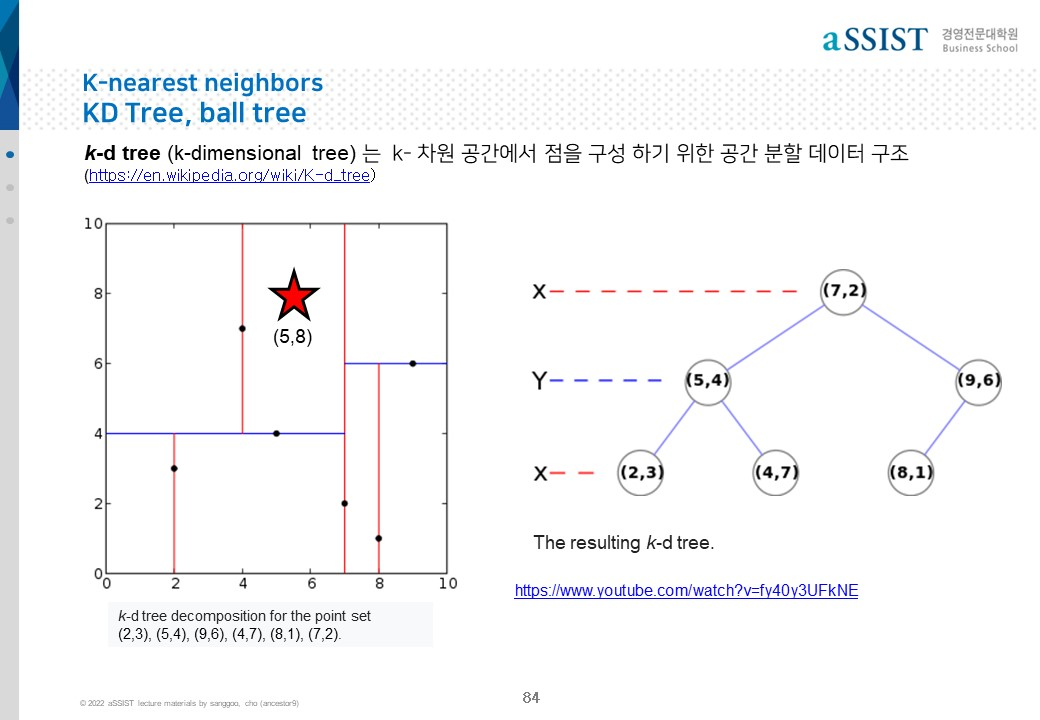

In [ ]:
Image(filename=dir_path + '/슬라이드84.jpg', width=width, height=height)

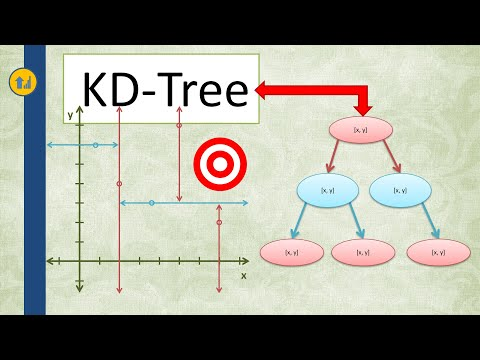

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('Glp7THUpGow', height='600', width='1000', start =(4*60+30))

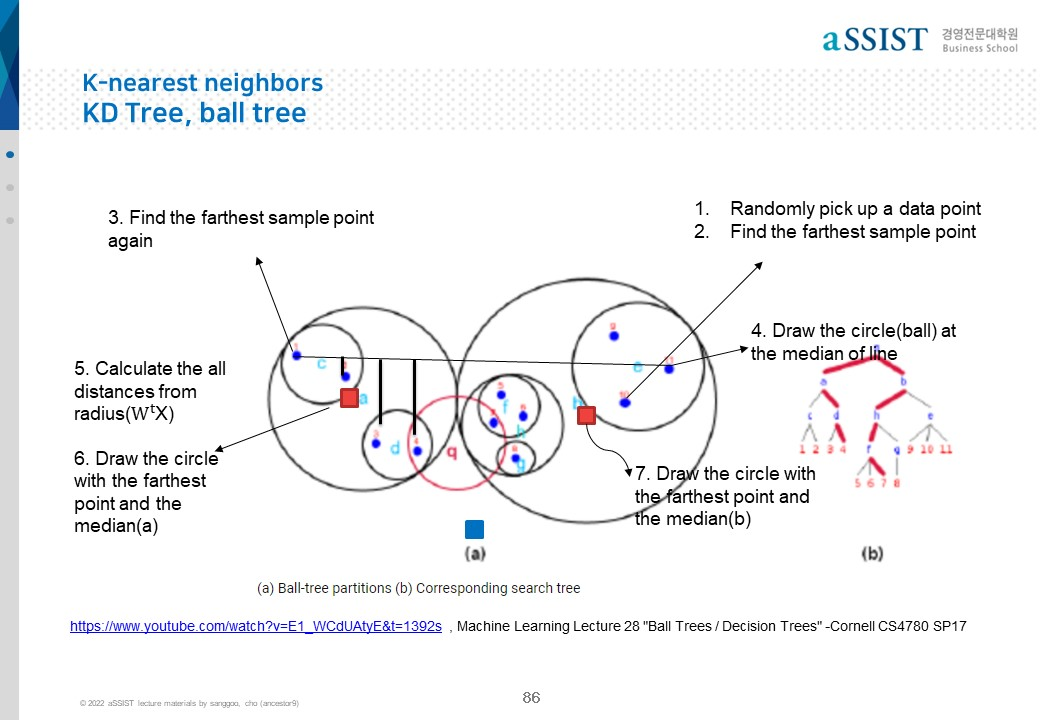

In [ ]:
Image(filename=dir_path + '/슬라이드86.jpg', width=width, height=height)

In [ ]:
from sklearn import neighbors
neighbors.KNeighborsClassifier().get_params()
neighbors.NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [ ]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
KNeighborsClassifier().get_params()
NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

#  KNN의 이해
### k-Nearest Neighbors and the Curse of Dimensionality

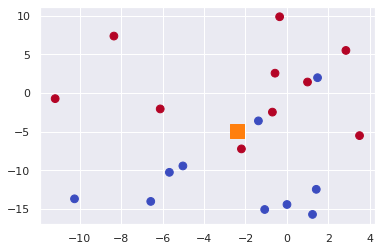

In [ ]:
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(20, 2, centers=2, random_state=2, cluster_std=5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

In [ ]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(1)
cross_val_score(model, X, y, cv=5)
print('\n')
model.fit(X, y).predict(Xnew)
y_predict = model.fit(X, y).predict(X)
print('\n')
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([0.5 , 0.75, 0.5 , 1.  , 0.75])

array([0])



정확도(Accuracy): 100.00%


In [ ]:
model = KNeighborsClassifier(5)                    
cross_val_score(model, X, y, cv=5)
print('\n')
model.fit(X, y).predict(Xnew)
y_predict = model.fit(X, y).predict(X)
print('\n')
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([1.  , 0.75, 0.5 , 1.  , 1.  ])

array([1])



정확도(Accuracy): 85.00%


### n_neighbors개수가 적을수로 Overfitting

KNeighborsClassifier(n_neighbors=1)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 1)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=20)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 20)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

KNeighborsClassifier(n_neighbors=50)

<Figure size 576x432 with 0 Axes>

(3.3, 8.880000000000006)

(1.0, 5.380000000000004)

Text(0.5, 1.0, '3-Class classification (k = 50)')

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

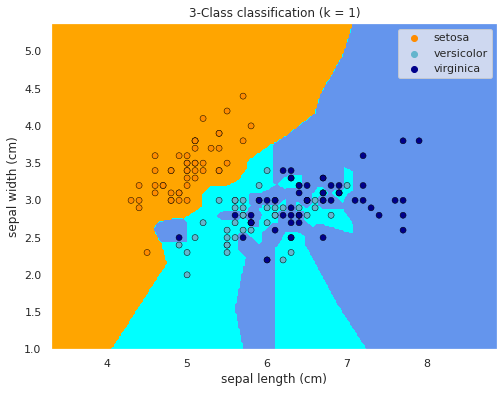

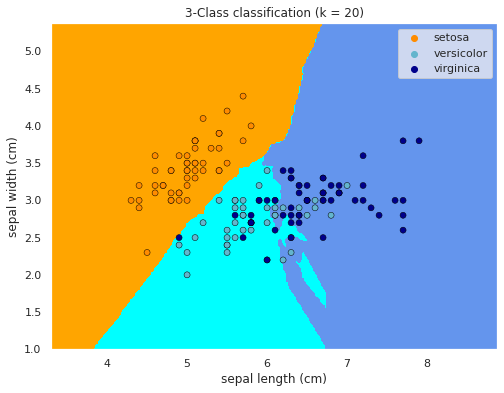

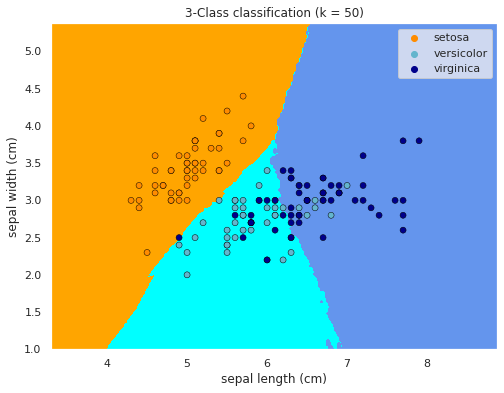

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for n_neighbors in [1, 20, 50]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

k=1 인경우는 최근접이웃 분류기는 훈련 데이터를 기억하여 훈련 데이터에 대한 예측 오류가 0(100% 정확도), 즉 극단적 과적합(overfitting) 발생

### K가 클수록 과적합을 방지하게 되고 훈련데이터의 정확도는 떨어지지만 새로운 데이터에 대한 예측력은 높아지게 된다. 
- k의 개수는 hyperparameter 대상

# 이미지 인식 성능은 not good, KNN은 거리를 기준으로 분류하기에 차원의 저주 영향으로 고차원 데이터에는 적합하지 않음

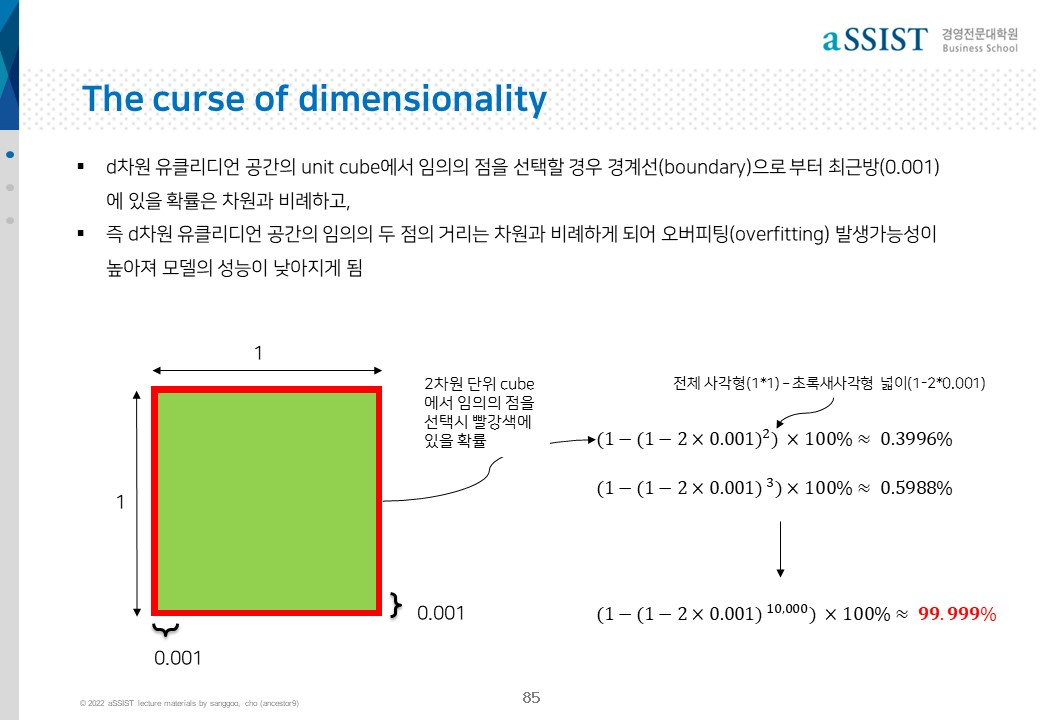

In [ ]:
Image(filename=dir_path + '/슬라이드85.jpg', width=width, height=height)

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


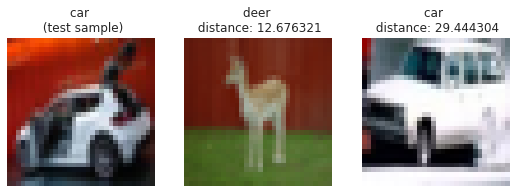

In [ ]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 3,1)

plt.imshow(X_test[6].astype('uint8'));
plt.title("%s \n (test sample)" % classes[y_test[6][0]]);
plt.axis('off');

plt.subplot(1,3,2)

plt.imshow(X_train[38805].astype('uint8'));
dist = np.linalg.norm(X_train[38805].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[38805][0]], dist));
plt.axis('off');

plt.subplot(1,3,3)

plt.imshow(X_train[32488].astype('uint8'));
dist = np.linalg.norm(X_train[32488].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[32488][0]], dist));
plt.axis('off');

## KNN과 차원의 저주(curse of dimensionality)
- 차원이 높아질수록 인스턴스간 거리는 점점 멀어지게 되어 거리로 구분하기 어려움
- 이미지데이터를 잘 구분 못하는 이유는 이미지는 차원이 높기 때문

##  1. K-Nearest Neighbors Classification
###  Step by Step Diabetes Classification-KNN-detailed
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [ ]:
from sklearn import datasets, neighbors, metrics
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Outcome'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Outcome
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
from sklearn import model_selection, preprocessing, pipeline

X = df.drop(["Outcome"],axis = 1)
y = df.Outcome
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=11)
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=11)
np.random.seed(111)
pipe = pipeline.make_pipeline(
    #preprocessing.StandardScaler(),
    neighbors.KNeighborsClassifier()
)
param_dist= {'kneighborsclassifier__n_neighbors' : list(range(5,50, 2)),
             'kneighborsclassifier__weights'  : ['uniform','distance'],
             'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree'],
             'kneighborsclassifier__leaf_size'  : list(range(5,50, 3))}

In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'kneighborsclassifier', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [ ]:
randomized = model_selection.RandomizedSearchCV(estimator= pipe, 
                                                param_distributions= param_dist, 
                                                cv=kf,
                                                n_iter=50, random_state=1357,
                                                scoring= 'recall_macro', verbose=True)
randomized.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=Pipeline(steps=[('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=50,
                   param_distributions={'kneighborsclassifier__algorithm': ['ball_tree',
                                                                            'kd_tree'],
                                        'kneighborsclassifier__leaf_size': [5,
                                                                            8,
                                                                            11,
                                                                            14,
                                                                            17,
                                                                            20,
                                                                            23,
                    

In [ ]:
print(f'optimal train score: {randomized.best_score_:.3f}') 
print(f'test score         : {randomized.score(X_test, y_test):.3f}')
print(f'optimal parameter  : {randomized.best_params_}')

optimal train score: 0.704
test score         : 0.725
optimal parameter  : {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 23, 'kneighborsclassifier__algorithm': 'ball_tree'}


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.75      0.64      0.69        14
           2       0.54      0.70      0.61        10

    accuracy                           0.72        36
   macro avg       0.73      0.73      0.72        36
weighted avg       0.74      0.72      0.73        36



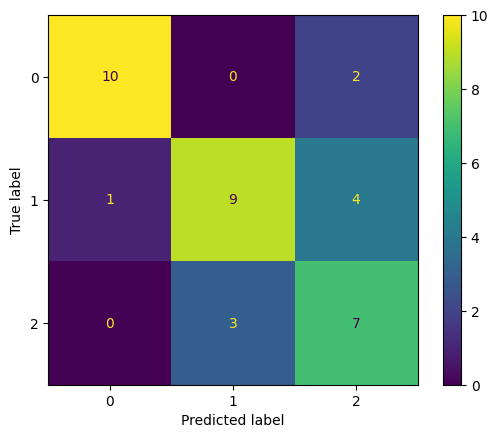

In [ ]:
sns.reset_defaults()
metrics.plot_confusion_matrix(randomized, X_test, y_test)
y_pred = randomized.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

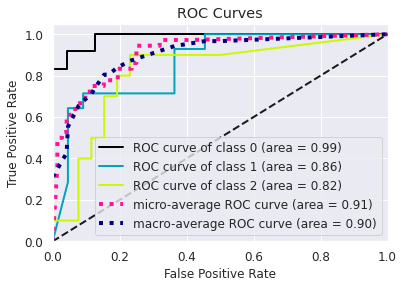

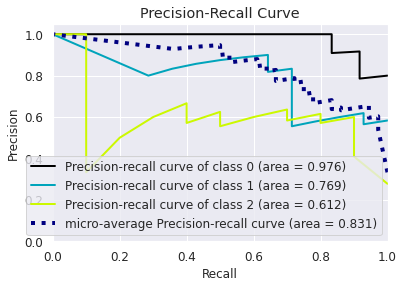

In [ ]:
! pip install scikit-plot
import scikitplot as skplt 
y_probas = randomized.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

## 2.  KNN regressor

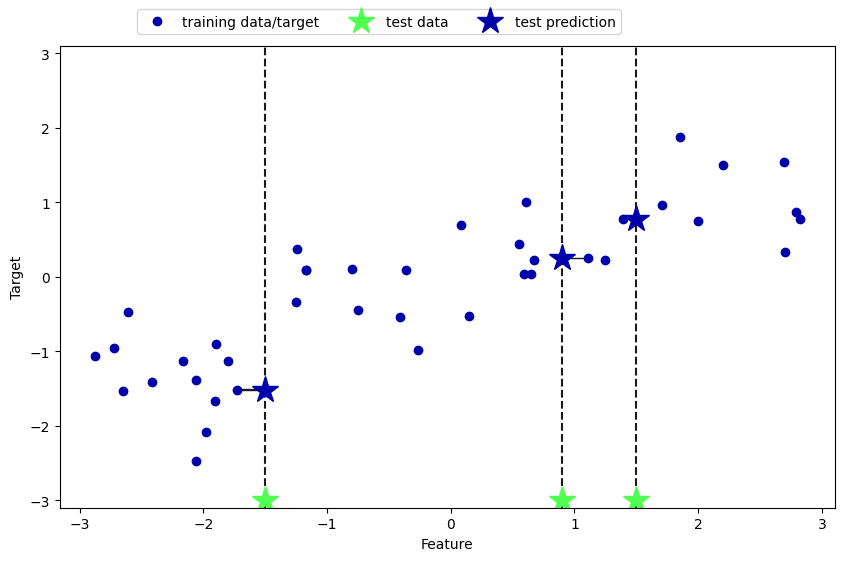

In [ ]:
! pip install mglearn
import mglearn
mglearn.plot_knn_regression.plot_knn_regression()

<Figure size 2500x700 with 0 Axes>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 3')

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 10')

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 20')

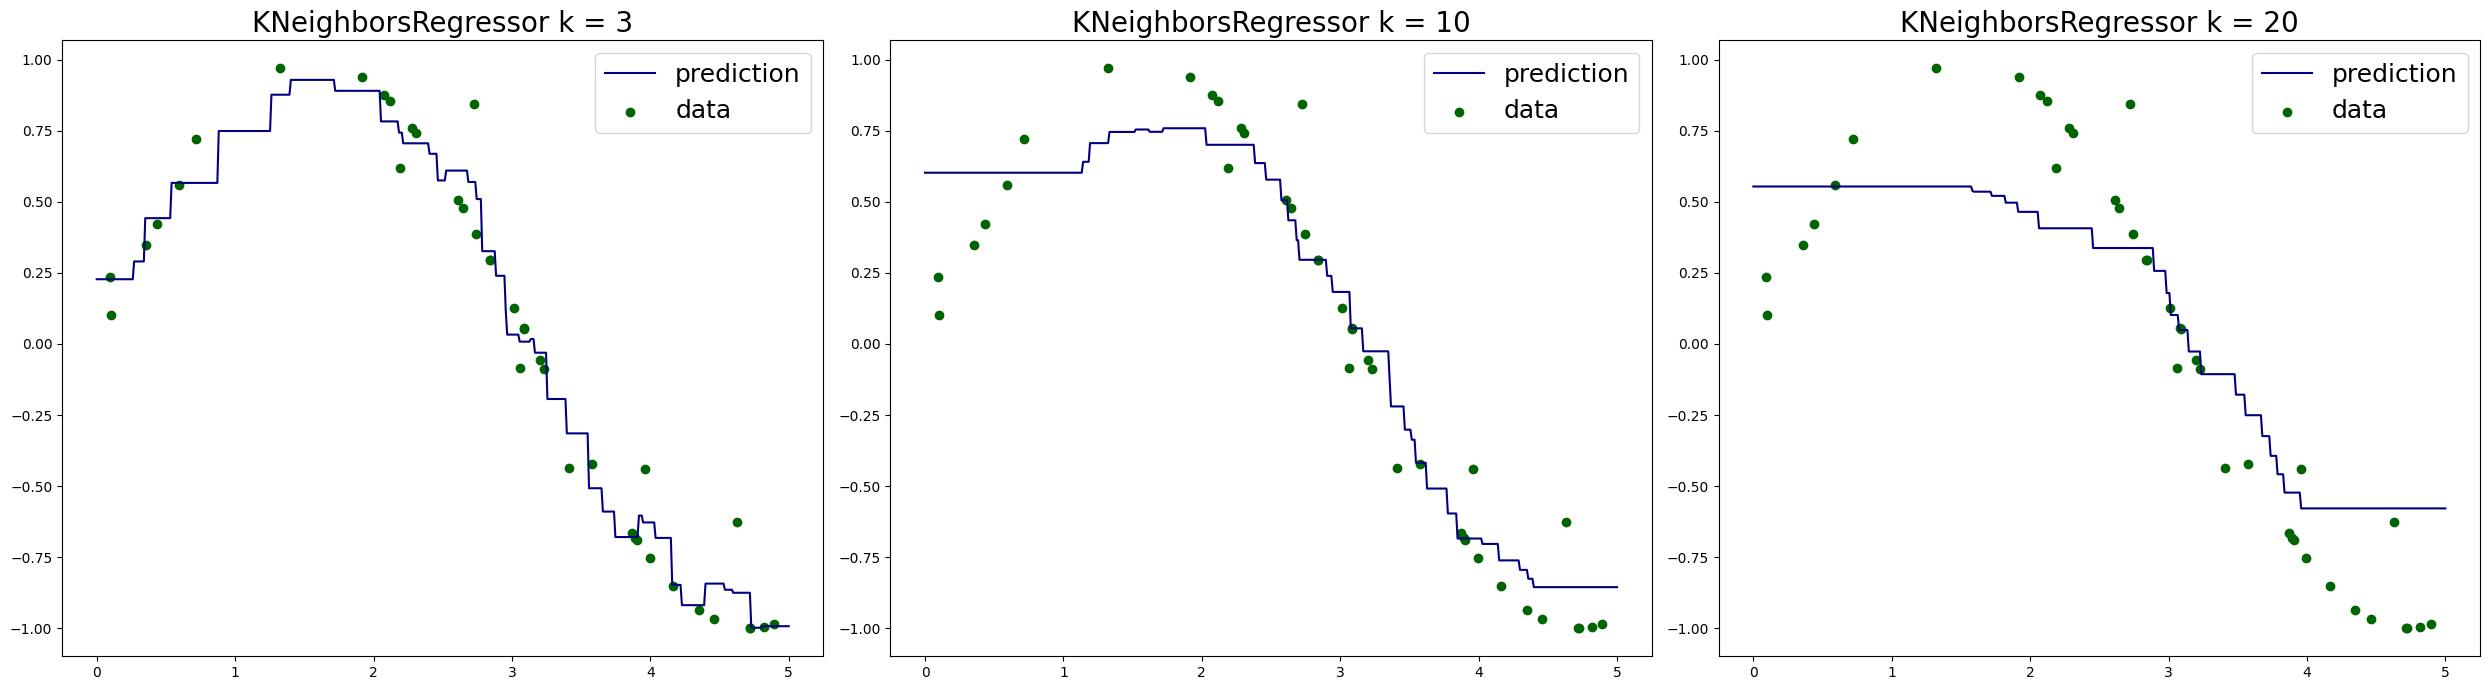

In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8)) # noise 생성

plt.figure(figsize=(25, 7)) 
for i, neighbor in enumerate([3, 10, 20]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=neighbor)
    y_ = knn.fit(X, y).predict(T)
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='darkgreen', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend(fontsize='18')
    plt.title(f'KNeighborsRegressor k = {neighbor}',
             fontsize='20')
plt.tight_layout()
plt.show()


(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'uniform')")

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, "KNeighborsRegressor (k = 5, weights = 'distance')")

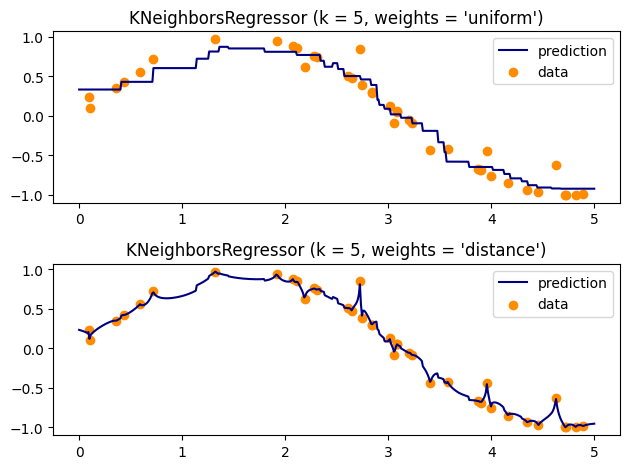

In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

## 2. Unsupervised K-Nearest Neighbors
https://scikit-learn.org/stable/modules/neighbors.html

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

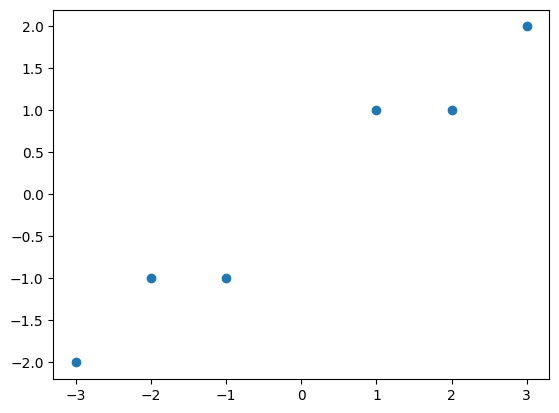

In [ ]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices # 각 인스턴스별로 자신을 포함하여 가장 가까운 인스턴스의 인덱스
print('\n')
distances # 각 인스턴스별로 자신을 포함하여 가장 가까운 인스턴스와의 거리

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [ ]:
nbrs.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'radius': 1.0}

### a sparse graph showing the connections between neighboring points:

In [ ]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

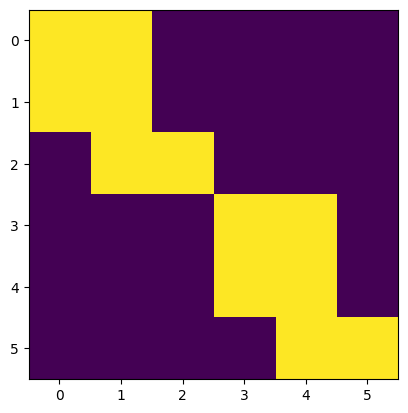

In [ ]:
plt.imshow(nbrs.kneighbors_graph(X).toarray())

## <font color ='purple'> KNN 알고리즘은 instace의 거리를 기준으로 하기 떄문에 반드시 표준화가 필요

# End

## KNN Imputer
Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [ ]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X
print('\n')
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0
